# 서울시 구별 CCTV 현황 분석하기

### 작성 : [PinkWink](http://pinkwink.kr)

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
* Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
* Pandas와 Matplotlib의 기본적 사용법을 확인
* 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인

In [1]:
# Matplotlib 폰트 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# 구글드라이브 마운트 -> csv, xlsx파일 가져오기위해

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
# 서울 cctv 개수 데이터.csv 파일 불러오기

CCTV_Seoul = pd.read_csv('/content/drive/MyDrive/DataScience/data/01. CCTV_in_Seoul.csv',  encoding='utf-8')

# head부분 5개 보여줘
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
# 컬럼명 확인

CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
# 컬럼명 '기관명'을 '구별'로 바꾸려고 해
# 컬럼명 '기관명' 인덱싱하기

CCTV_Seoul.columns[0]

'기관명'

In [7]:
# 컬럼명 '기관명'을 '구별'로 바꾸기


# 방법 1. rename
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

# 방법 2. 컬럼명 덮어쓰기

# CCTV_Seoul.columns = ['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년']
# CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 2-2. 엑셀파일 읽기 - 서울시 인구현황

In [8]:
# 오류코드 최신본으로 변경

# xlsx파일 전체를 가져올 때

xlsxFile = '/content/drive/MyDrive/DataScience/data/01. population_in_Seoul.xls'
pop_Seoul = pd.read_excel(xlsxFile)
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [9]:
# xlsx파일의 일부 Value만 가져올 때
# csv파일로는 안되고 xlsx파일만 가능 (csv > converting)

pop_Seoul = pd.read_excel(xlsxFile,
                          # header : xlsx파일의 컬럼명이 여러 행일경우 적절히 선택
                          header = 2,

                          # usecols : 컬럼 중에 가져올 컬럼을 지정
                          usecols = 'B, D, G, J, N',)

pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [10]:
# 컬럼명 변경
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [11]:
# 전처리 대상 확인을 위해 데이터 확인

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [12]:
pop_Seoul.tail()


# 전처리 대상 확인

# row1 : 구별 인구수를 확인해야하므로 합계 칸 삭제
# row27 : NaN

,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


# 3. Pandas 기초

In [13]:
import pandas as pd
import numpy as np

In [14]:
s = pd.Series([1,3,5,np.nan,6,8])
s

,0
0,1.0
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


In [15]:
# pandas에서 range 함수 역할
# range(1,10,1) : 1~9까지 숫자 생성
# data_range() : 숫자대신 날짜 생성

dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df = pd.DataFrame(np.random.randn(6,4), index=dates,
                  columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,0.919278,1.635757,0.288562,-0.309206
2013-01-02,1.163250,0.581462,-0.018074,-1.113483
2013-01-03,-0.479815,0.733148,-0.359556,0.320446
2013-01-04,-0.303456,0.578796,-0.013550,0.801589
2013-01-05,-1.243338,0.064489,0.764838,-0.849666
2013-01-06,-0.048237,-0.320259,1.189618,-0.646878


In [17]:
# 1~5번까지 데이터프레임 확인

df.head()

,A,B,C,D
2013-01-01,0.919278,1.635757,0.288562,-0.309206
2013-01-02,1.163250,0.581462,-0.018074,-1.113483
2013-01-03,-0.479815,0.733148,-0.359556,0.320446
2013-01-04,-0.303456,0.578796,-0.013550,0.801589
2013-01-05,-1.243338,0.064489,0.764838,-0.849666


In [18]:
# 데이터프레임 확인 (1~3번까지)

df.head(3)

,A,B,C,D
2013-01-01,0.919278,1.635757,0.288562,-0.309206
2013-01-02,1.163250,0.581462,-0.018074,-1.113483
2013-01-03,-0.479815,0.733148,-0.359556,0.320446


In [19]:
# 인덱스 확인

df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
# 컬럼명 확인

df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
# 밸류값 확인

df.values

array([[ 0.91927835,  1.63575699,  0.28856229, -0.30920607],
       [ 1.16324981,  0.58146176, -0.01807388, -1.11348264],
       [-0.47981485,  0.73314756, -0.35955632,  0.32044626],
       [-0.30345605,  0.57879561, -0.0135497 ,  0.8015894 ],
       [-1.24333811,  0.06448909,  0.76483753, -0.84966575],
       [-0.04823695, -0.32025923,  1.18961808, -0.64687788]])

In [22]:
# 데이터프레임 정보

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [23]:
# 데이터프레임 수치적인 통계값 확인

df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.001280,0.545565,0.308640,-0.299533
std,0.902080,0.664407,0.573005,0.732495
min,-1.243338,-0.320259,-0.359556,-1.113483
25%,-0.435725,0.193066,-0.016943,-0.798969
50%,-0.175847,0.580129,0.137506,-0.478042
75%,0.677400,0.695226,0.645769,0.163033
max,1.163250,1.635757,1.189618,0.801589


In [24]:
# B 컬럼의 value들을 기준으로 오름차순 정렬

df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-01,0.919278,1.635757,0.288562,-0.309206
2013-01-03,-0.479815,0.733148,-0.359556,0.320446
2013-01-02,1.163250,0.581462,-0.018074,-1.113483
2013-01-04,-0.303456,0.578796,-0.013550,0.801589
2013-01-05,-1.243338,0.064489,0.764838,-0.849666
2013-01-06,-0.048237,-0.320259,1.189618,-0.646878


In [25]:
# 정렬되지 않은 df와 비교

df

,A,B,C,D
2013-01-01,0.919278,1.635757,0.288562,-0.309206
2013-01-02,1.163250,0.581462,-0.018074,-1.113483
2013-01-03,-0.479815,0.733148,-0.359556,0.320446
2013-01-04,-0.303456,0.578796,-0.013550,0.801589
2013-01-05,-1.243338,0.064489,0.764838,-0.849666
2013-01-06,-0.048237,-0.320259,1.189618,-0.646878


In [26]:
# 컬럼명 A열 추출 == Series A 추출

df['A']

,A
2013-01-01,0.919278
2013-01-02,1.163250
2013-01-03,-0.479815
2013-01-04,-0.303456
2013-01-05,-1.243338
2013-01-06,-0.048237


In [27]:
# 0~2행 슬라이싱
# index 행번호

df[0:3]

,A,B,C,D
2013-01-01,0.919278,1.635757,0.288562,-0.309206
2013-01-02,1.163250,0.581462,-0.018074,-1.113483
2013-01-03,-0.479815,0.733148,-0.359556,0.320446


In [28]:
# index 이름으로 슬라이싱

df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.163250,0.581462,-0.018074,-1.113483
2013-01-03,-0.479815,0.733148,-0.359556,0.320446
2013-01-04,-0.303456,0.578796,-0.013550,0.801589


In [29]:
# 특정 데이터 지목
# dates가 index
# date[0] == index의 0번째 행

df.loc[dates[0]]

,2013-01-01
A,0.919278
B,1.635757
C,0.288562
D,-0.309206


In [30]:
# 범위 색인
# 행 Row : 모든 행
# 열 Col : 리스트 범위까지

##############################################
# loc : start ~ end 이라 : 모든 범위 포함
##############################################
# iloc : start ~ end 미만 : end - 1


df.loc[:,['A','B']]

,A,B
2013-01-01,0.919278,1.635757
2013-01-02,1.163250,0.581462
2013-01-03,-0.479815,0.733148
2013-01-04,-0.303456,0.578796
2013-01-05,-1.243338,0.064489
2013-01-06,-0.048237,-0.320259


In [31]:
#      ________Row_________  ___Col____
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.163250,0.581462
2013-01-03,-0.479815,0.733148
2013-01-04,-0.303456,0.578796


In [32]:
df.loc['20130102',['A','B']]

,2013-01-02
A,1.163250
B,0.581462


In [33]:
df.loc[dates[0],'A']

0.9192783518745302

In [34]:
# 숫자로 색인
# index 3 Row의 모든 column

df.iloc[3]

,2013-01-04
A,-0.303456
B,0.578796
C,-0.013550
D,0.801589


In [35]:
# Row 3:5
# col 0:2

df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.303456,0.578796
2013-01-05,-1.243338,0.064489


In [36]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.163250,-0.018074
2013-01-03,-0.479815,-0.359556
2013-01-05,-1.243338,0.764838


In [37]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.163250,0.581462,-0.018074,-1.113483
2013-01-03,-0.479815,0.733148,-0.359556,0.320446


In [38]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.635757,0.288562
2013-01-02,0.581462,-0.018074
2013-01-03,0.733148,-0.359556
2013-01-04,0.578796,-0.013550
2013-01-05,0.064489,0.764838
2013-01-06,-0.320259,1.189618


In [39]:
df

,A,B,C,D
2013-01-01,0.919278,1.635757,0.288562,-0.309206
2013-01-02,1.163250,0.581462,-0.018074,-1.113483
2013-01-03,-0.479815,0.733148,-0.359556,0.320446
2013-01-04,-0.303456,0.578796,-0.013550,0.801589
2013-01-05,-1.243338,0.064489,0.764838,-0.849666
2013-01-06,-0.048237,-0.320259,1.189618,-0.646878


In [40]:
# boolean indexing
# True, False로 반환

df[df.A > 0]

,A,B,C,D
2013-01-01,0.919278,1.635757,0.288562,-0.309206
2013-01-02,1.163250,0.581462,-0.018074,-1.113483


In [41]:
df[df > 0]

,A,B,C,D
2013-01-01,0.919278,1.635757,0.288562,NaN
2013-01-02,1.163250,0.581462,NaN,NaN
2013-01-03,NaN,0.733148,NaN,0.320446
2013-01-04,NaN,0.578796,NaN,0.801589
2013-01-05,NaN,0.064489,0.764838,NaN
2013-01-06,NaN,NaN,1.189618,NaN


In [42]:
# df copy

df2 = df.copy()

In [43]:
# E 컬럼 추가

df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.919278,1.635757,0.288562,-0.309206,one
2013-01-02,1.163250,0.581462,-0.018074,-1.113483,one
2013-01-03,-0.479815,0.733148,-0.359556,0.320446,two
2013-01-04,-0.303456,0.578796,-0.013550,0.801589,three
2013-01-05,-1.243338,0.064489,0.764838,-0.849666,four
2013-01-06,-0.048237,-0.320259,1.189618,-0.646878,three


In [44]:
# isin : 안에 ~~ 데이터가 있냐 없냐?
# boolean으로 출력됨

df2['E'].isin(['two','four'])

,E
2013-01-01,False
2013-01-02,False
2013-01-03,True
2013-01-04,False
2013-01-05,True
2013-01-06,False


In [45]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.479815,0.733148,-0.359556,0.320446,two
2013-01-05,-1.243338,0.064489,0.764838,-0.849666,four


In [46]:
df

,A,B,C,D
2013-01-01,0.919278,1.635757,0.288562,-0.309206
2013-01-02,1.163250,0.581462,-0.018074,-1.113483
2013-01-03,-0.479815,0.733148,-0.359556,0.320446
2013-01-04,-0.303456,0.578796,-0.013550,0.801589
2013-01-05,-1.243338,0.064489,0.764838,-0.849666
2013-01-06,-0.048237,-0.320259,1.189618,-0.646878


In [47]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.919278,1.635757,0.288562,-0.309206
2013-01-02,2.082528,2.217219,0.270488,-1.422689
2013-01-03,1.602713,2.950366,-0.089068,-1.102242
2013-01-04,1.299257,3.529162,-0.102618,-0.300653
2013-01-05,0.055919,3.593651,0.662220,-1.150319
2013-01-06,0.007682,3.273392,1.851838,-1.797197


In [48]:
df.apply(lambda x: x.max() - x.min())

,0
A,2.406588
B,1.956016
C,1.549174
D,1.915072


# 4. CCTV 데이터 파악하기

In [49]:
CCTV_Seoul.head()

# 2013년도 이전 : 기존에 설치된 CCTV 갯수
# 2014년 이후 : 매년 추가되는 CCTV 갯수
# 소계가 맞지 않는 이유 : 고장 등으로 없어진 CCTV 반영 안 됨

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [50]:
# 2016년도 기준. CCTV 갯수가 가장 적은 5개 구

CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [51]:
# 2016년도 기준. CCTV 갯수가 가장 많은 5개 구

CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [52]:
# ((2014 ~ 2016년까지 CCTV갯수) / 2013년 이전 CCTV 개수) * 100 = 최근 3년 CCTV 증가율

# 최근 증가율 컬럼 계산 + 컬럼 추가
# 최근 즐가율 기준으로 가장 증가율이 높은 5개 구 출력

CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100


CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


# 5. 서울시 인구 데이터 파악하기

In [53]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [54]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [55]:

# 이 프로젝트의 목적은 CCTV가 많은 구, 적은구를 비교하는 것
# 전체 합계는 필요없으므로 합계행은 삭제한다

pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()


,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [56]:
# 고유한 구별 이름을 리스트로 확인

pop_Seoul['구별'].unique()


array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [57]:
# nunique == number of unique : 고유한 구의 숫자를 세줌
# NaN은 제외하므로 사용해서 NaN이 몇개 인지 확인 가능

len(pop_Seoul['구별'].unique()), pop_Seoul['구별'].nunique()

(26, 25)

In [58]:
# isnull(), isna()
# NaN값이 있는 컬럼 주소 확인


# 실제 테이블 확인
print(pop_Seoul[pop_Seoul['구별'].isnull()])


# 인덱스로 확인
temp = pop_Seoul[pop_Seoul['구별'].isnull()].index
print(temp)

     구별  인구수  한국인  외국인  고령자
26  NaN  NaN  NaN  NaN  NaN
Index([26], dtype='int64')


In [59]:
# NaN이 있는 행을 삭제

pop_Seoul.drop(temp, inplace=True)
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [60]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [61]:
# 인구수가 가장 많은 구

pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [62]:
# 외국인 비율이 가장 높은 5개 구

pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [63]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [64]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [65]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 6. Pandas 고급 두 DataFrame 병합하기

In [66]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [67]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [68]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [69]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [70]:
# concat()

# df1~df3까지 기계적으로 붙여준다.
# 데이터프레임을 합할때 컬럼명이나, 인덱스를 신경쓰지 않고 붙여줄 때
# 데이터프레임 정리가 잘 되어있을 때 쓰기!

result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [71]:
# keys[]

# 데이터프레임 합쳐줄 때 option
# keys=['x', 'y', 'z'] 인덱스를 붙여줌

result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [72]:
# 멀티 인덱스
# 데이터프레임 붙일 때, keys를 붙여주면 멀티 인덱스가 됨
# 붙였지만, loc로 따로 불러올 수 있음

result.loc['x']

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [73]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [74]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [75]:
result.index.get_level_values(1)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [76]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [77]:
# concat axis

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

In [78]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [79]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [80]:
# concat axis=1 로 붙이면
# df1 우측에 가로로 붙는다
# 내가 의도하는 대로 안붙을수 있으므로
# concat 사용시에는 주의!

result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [81]:
# join=inner는 NaN값이 없는 행만 출력한다
# join default : outer > NaN값 출

result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [82]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [83]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [84]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [85]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [86]:
# merge on key
# 양쪽 데이터프레임에 겹치지 않는 key는 삭제하고 merge한다

pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [87]:
# how
# 어떤 프레임을 기준으로 합칠지 설정하는 option
# 기준 : left, right, inner, outer
# 기준에 벗어나는 values는 없어짐

pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [88]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [89]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [90]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


# 7. CCTV 데이터와 인구 데이터 합치고 분석하기

In [91]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [92]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [93]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [94]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [95]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [96]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [97]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [98]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 8. 그래프 그리기 기초 - matplotlib


[참조 사이트](https://matplotlib.org/cheatsheets/)

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

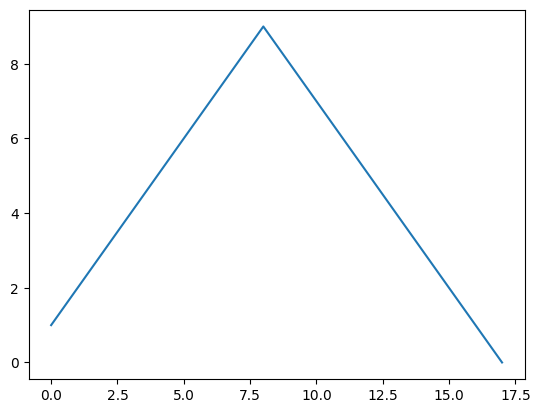

In [100]:
# 그래프 그리는 법


# 빈 캔버스 생성
plt.figure()

# 그래프를 그린다.
# dafault : y값만 입력

y = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0]

plt.plot(y)
plt.show()

In [101]:
# sin 그래프 그리는 법

# sin 데이터 생성

import numpy as np

# t : ndarray 생성
# 범위 : 0~12
# 단위 : 0.01씩 증가 (1200개 데이터 생성)
t = np.arange(0,12,0.01)

y = np.sin(t)

In [102]:
# 정말 1200개 데이터 생성했는지 확인하기

print(len(t))
print(len(y))

1200
1200


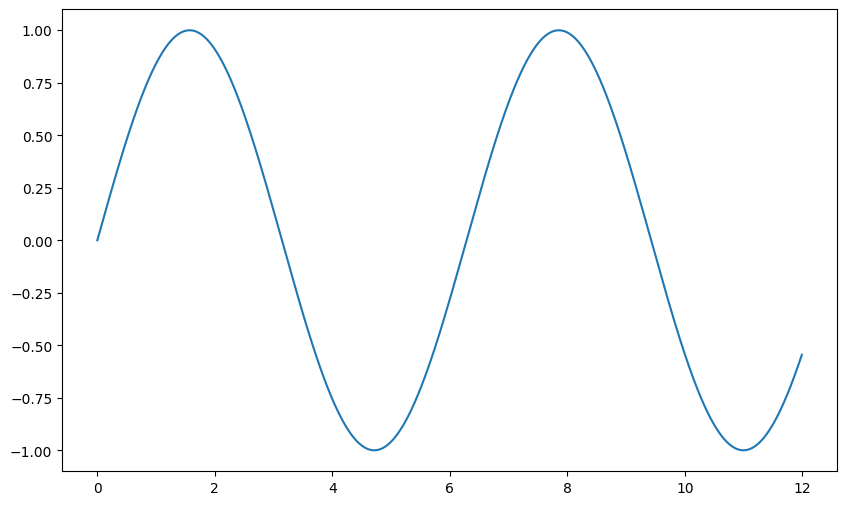

In [103]:
# 빈 캔버스를 생성한다
# 캔버스의 크기를 튜플로 설정. tuple (10,6)

plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.show()

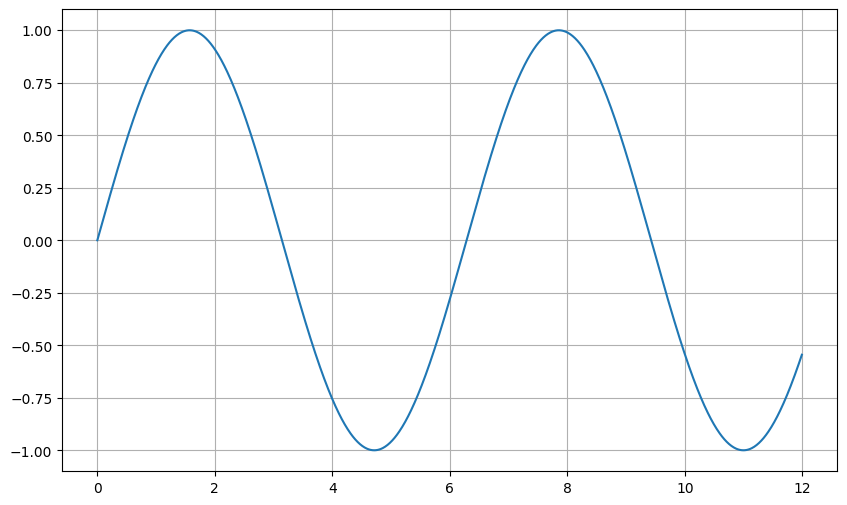

In [104]:
# 그리드 적용

plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid() # 그리드 적용하기 (눈금 적용)
plt.show()

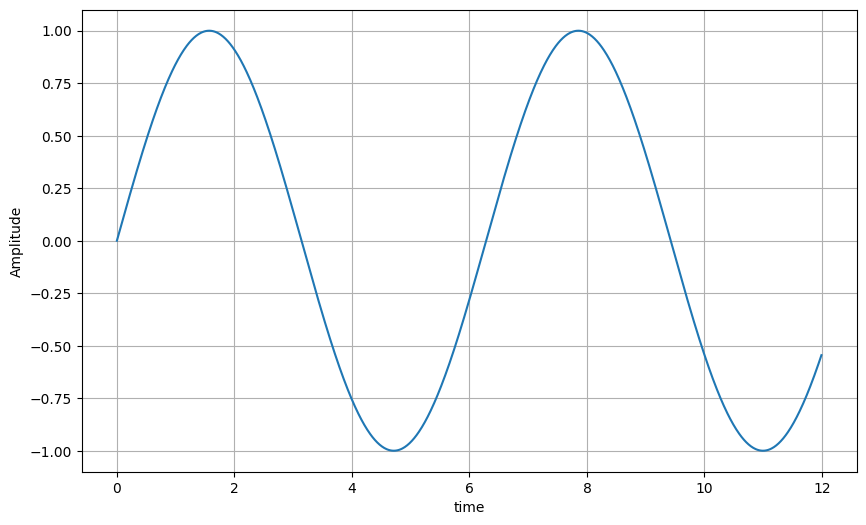

In [105]:
# 축 제목 설정

plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기
plt.show()

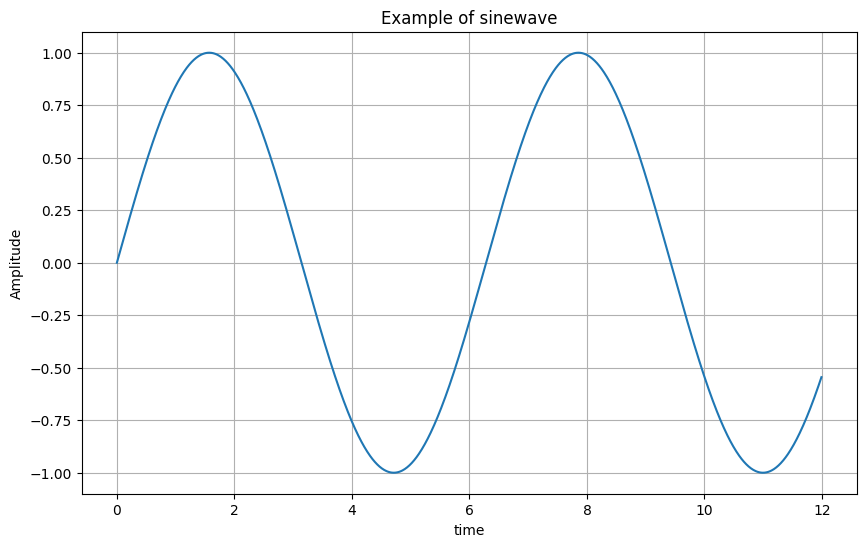

In [106]:
# 그래프 제목 설정

plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave') ####
plt.show()

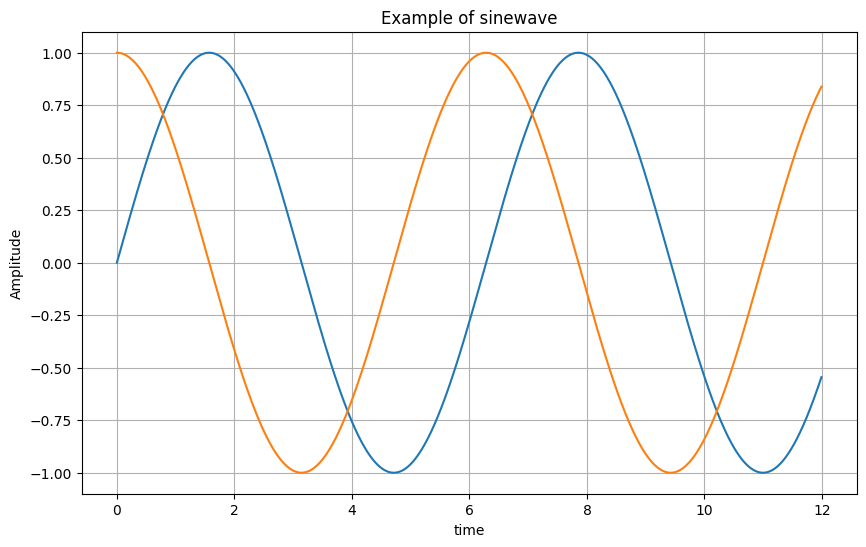

In [107]:
# 그래프 2개 생성
# plot 2개하면 matplotlib에서 자동으로 색상 변경

plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t)) ####
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

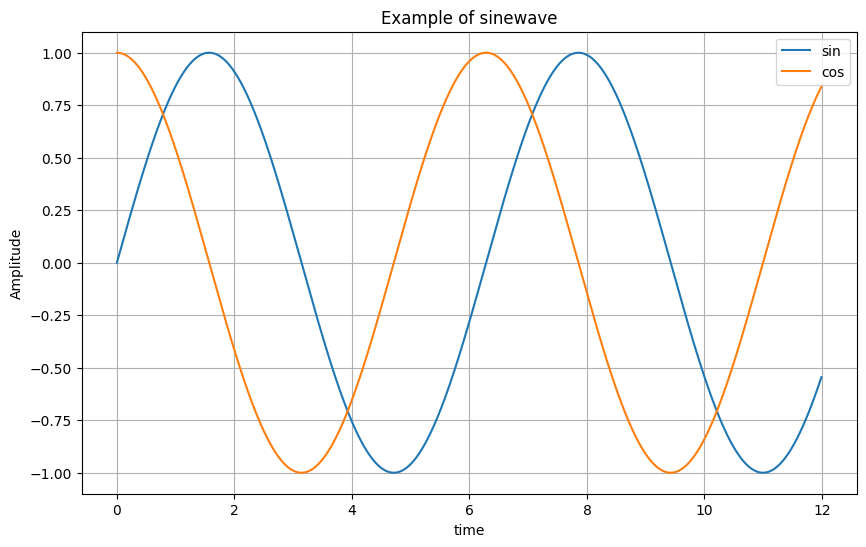

In [108]:
# 범례 붙이기

plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend() #####
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

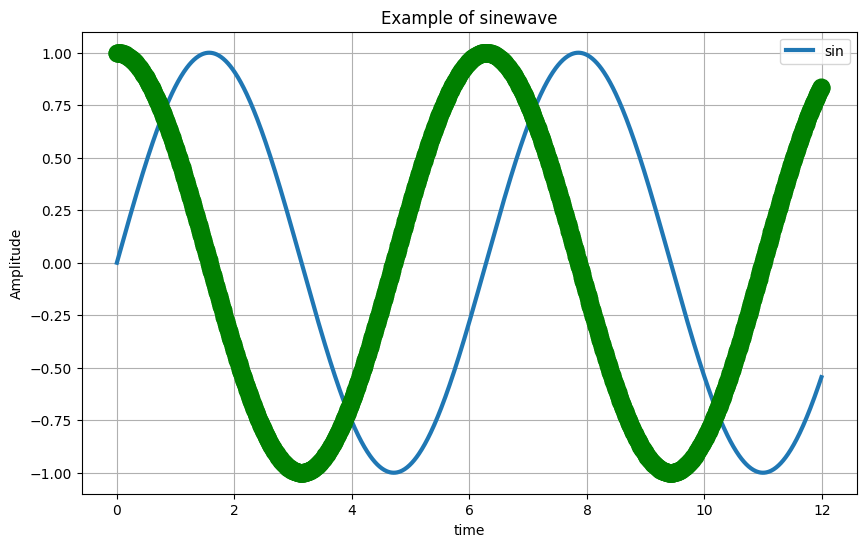

In [109]:
# 그래프 option 변경
# 선두께 : lw=(원하는 값)  # linewidth 약자임. 혼용 사용 가능
# 'r', 'g', 'b' 색상 변경

plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin') ####
plt.plot(t , np.cos(t), 'go--', linewidth=2, markersize=12) ####
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

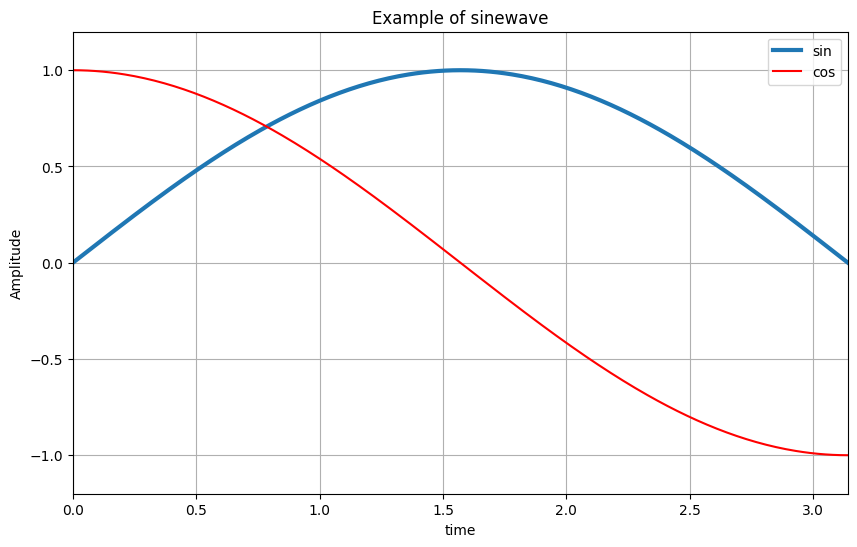

In [110]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

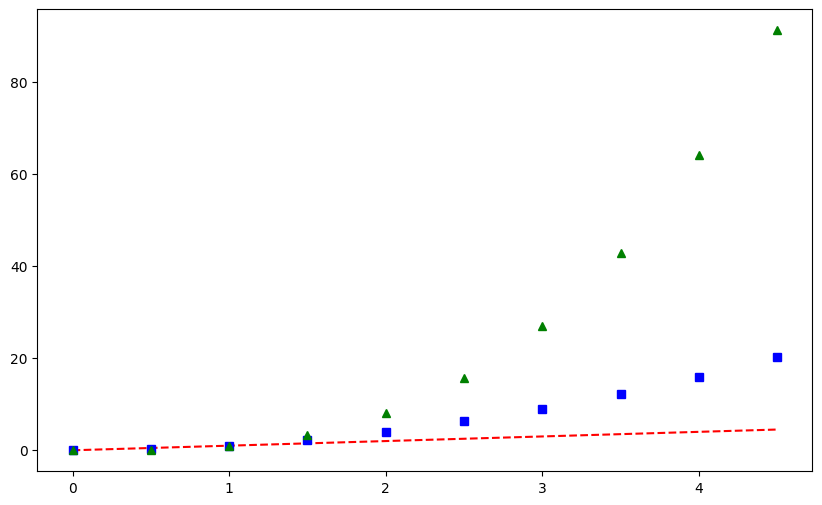

In [111]:
# 점 형태로도 그릴 수 있음
# * 사용

t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

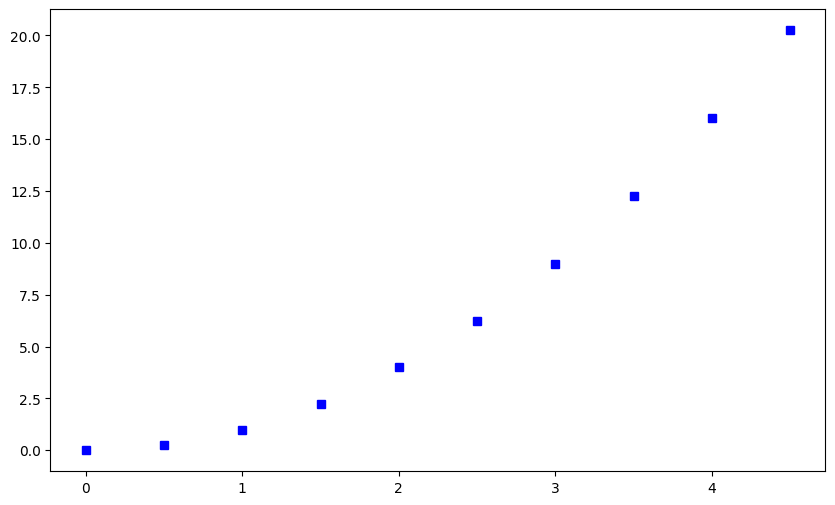

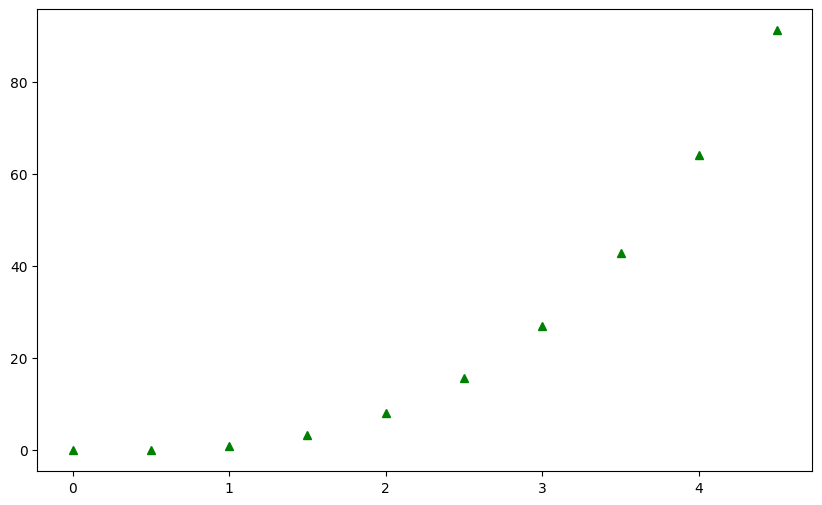

In [112]:
# 그래프를 따로 그릴 수 있음

t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
pl1 = plt.plot(t, t**2, 'bs')

plt.figure(figsize=(10,6))
pl2 = plt.plot(t, t**3, 'g^')

plt.show()

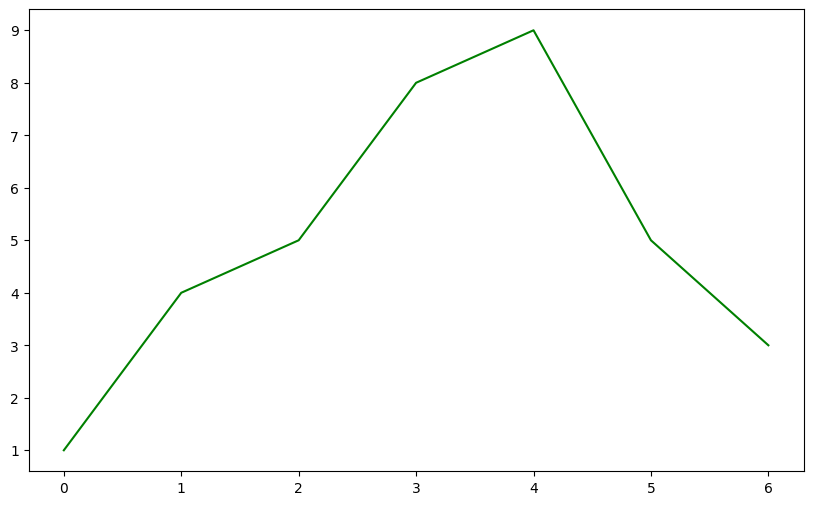

In [113]:
# 곡선 없는 일반 그래프

t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

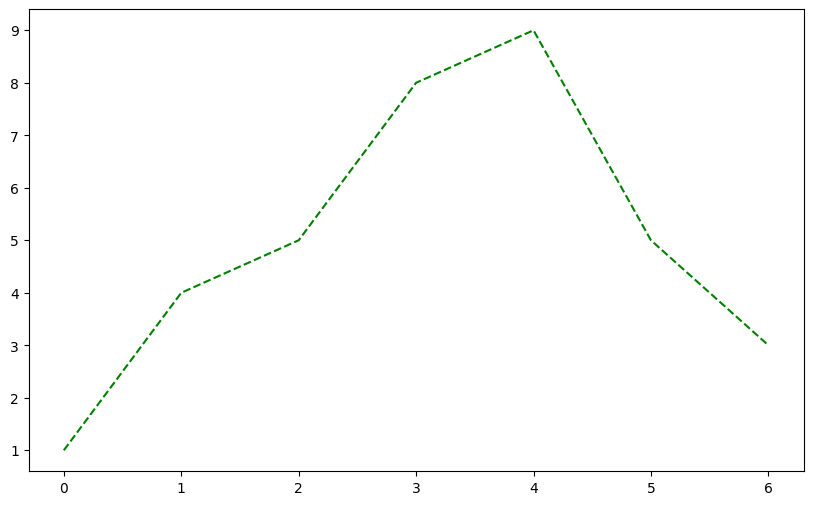

In [114]:
# 라인타일 '- -' 대시

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed') ####
plt.show()

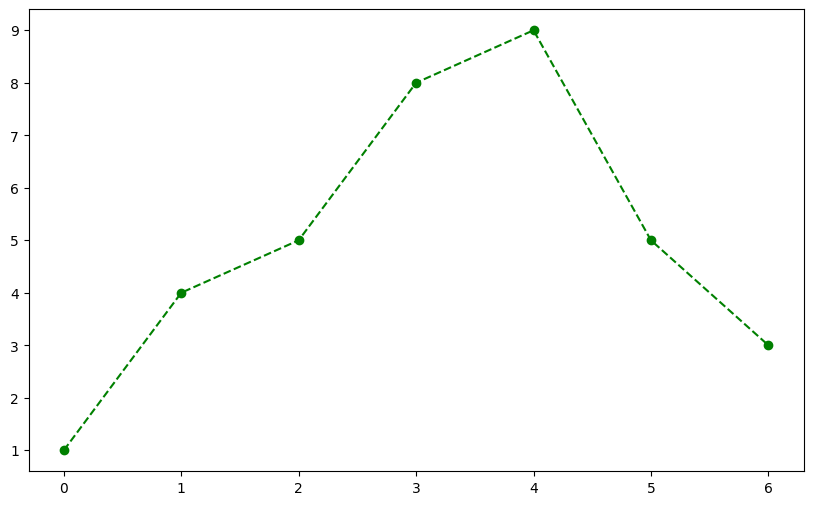

In [115]:
# 마커 표시

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o') ####
plt.show()

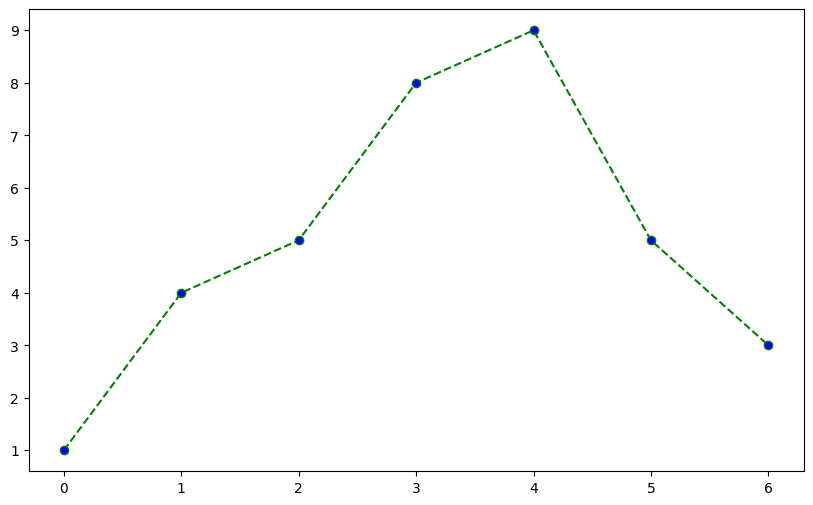

In [116]:
# 마커 색상 변경

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue') ####
plt.show()

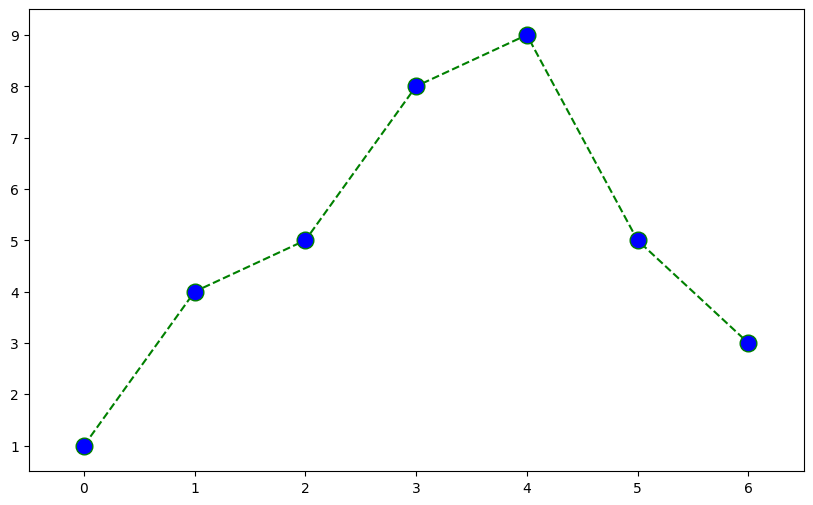

In [117]:
# 마커 사이즈 변경

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12) ####

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [118]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

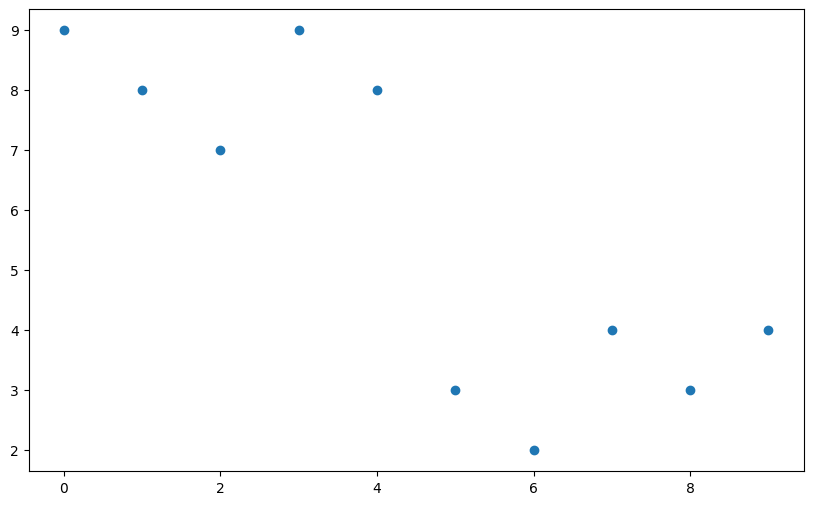

In [119]:
# 산점도 그래프 그리기

plt.figure(figsize=(10,6))
plt.scatter(t,y) ####
plt.show()

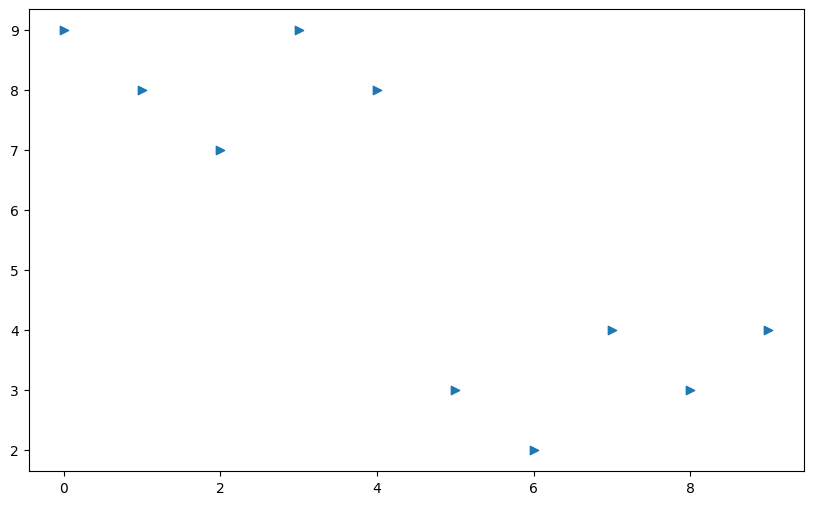

In [120]:
# 마커 모양 변경

plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>') ####
plt.show()

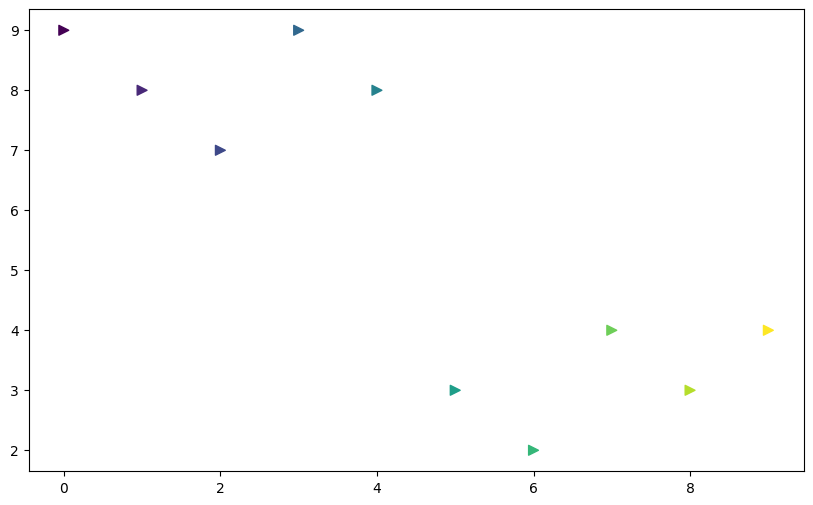

In [121]:
# 마커 색상을 컬러맵으로 변경

colormap = t ####

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()

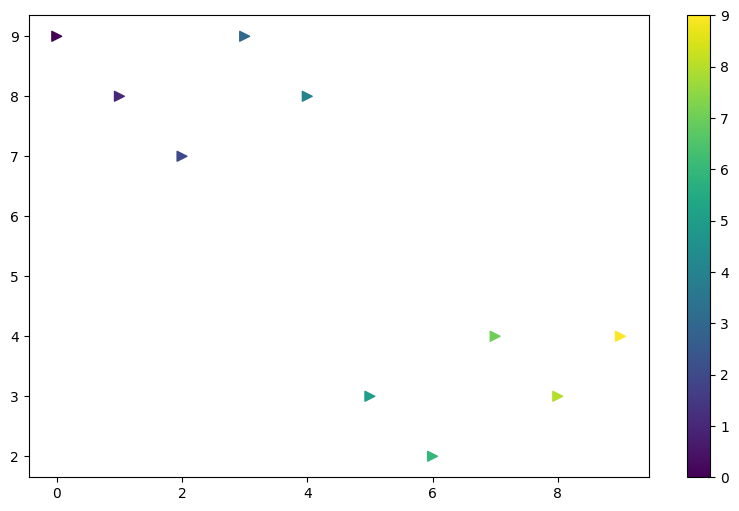

In [122]:
# 컬러맵이 무슨 의미인지 모르겠다?
# 컬러맵 비고표(colorbar) 추가

colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar() ####
plt.show()

In [123]:
# random.normal
# 정규분포를 따르는 그래프를 생성해주는 랜덤그래프를 만든다.
# 랜덤이라 약간씩 범위를 벗어나는 경우도 있다.


#                     _평균_  _편차_  _생성갯수_
s1 = np.random.normal(loc=0, scale=1, size=1000)    # 평균 0,  0~1사이에 숫자 1000개 생성
s2 = np.random.normal(loc=5, scale=0.5, size=1000)  # 평균 5,  4.5~5.5사이에 숫자 1000개 생성
s3 = np.random.normal(loc=10, scale=2, size=1000)   # 평균 10,  8~12사이에 숫자 1000개 생성

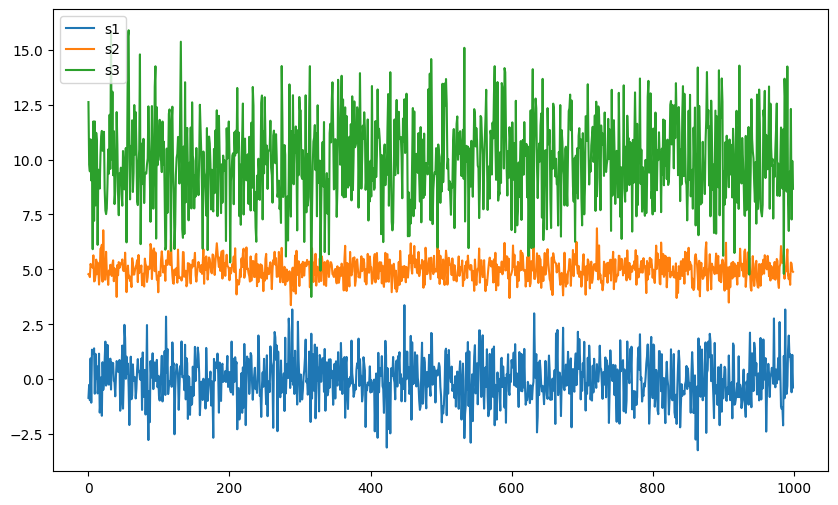

In [124]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

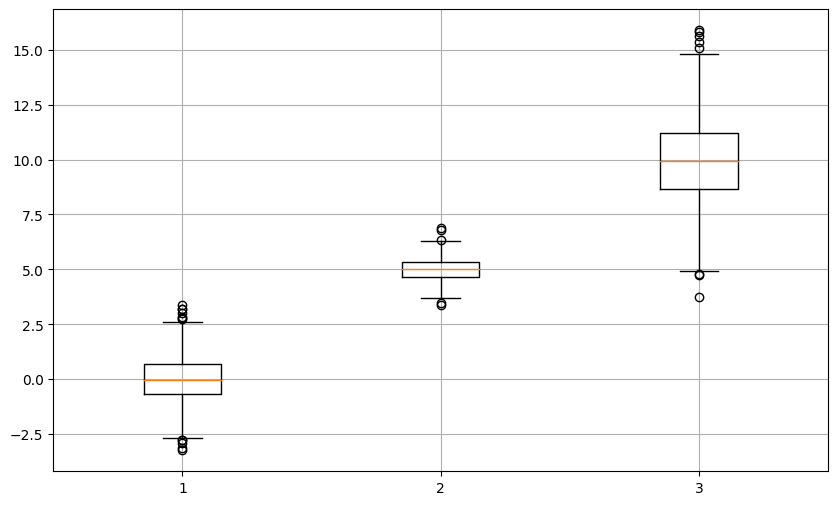

In [125]:
# boxplot
# outlier(이상치)를 점으로 찍어줌
# 눈으로 이상치를 확인할 수 있게 해주는 함수

plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3)) ####
plt.grid()
plt.show()

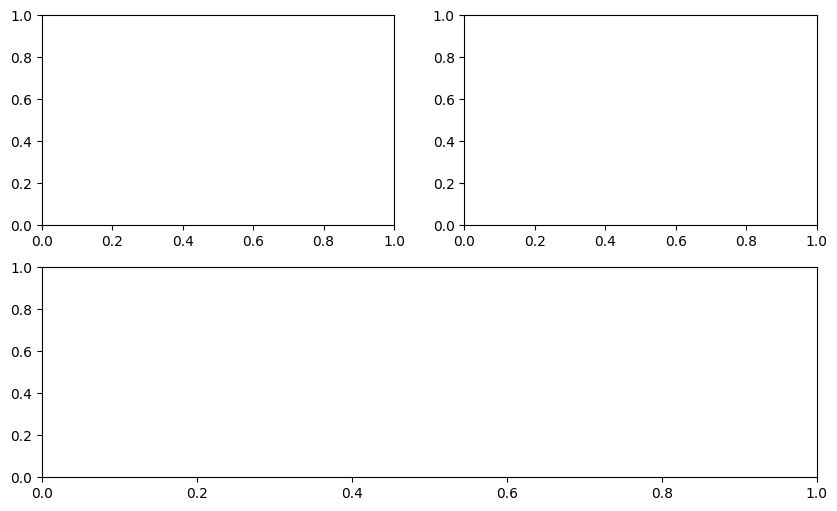

In [126]:
# subplot
# 그래프를 나눠서 그릴수도 있다.

plt.figure(figsize=(10,6))

plt.subplot(221)
plt.subplot(222)
plt.subplot(212)

plt.show()

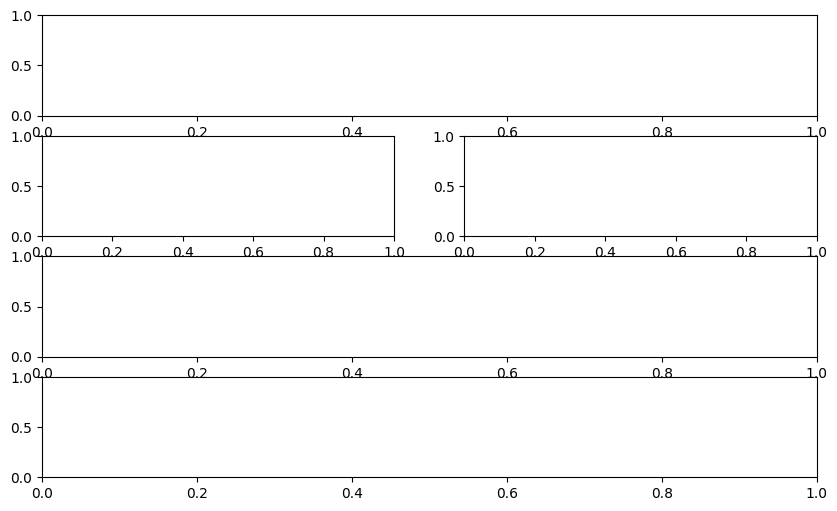

In [127]:
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

plt.show()

[계산 쉽게 하는 법 : PPT나 그림판으로 계산]

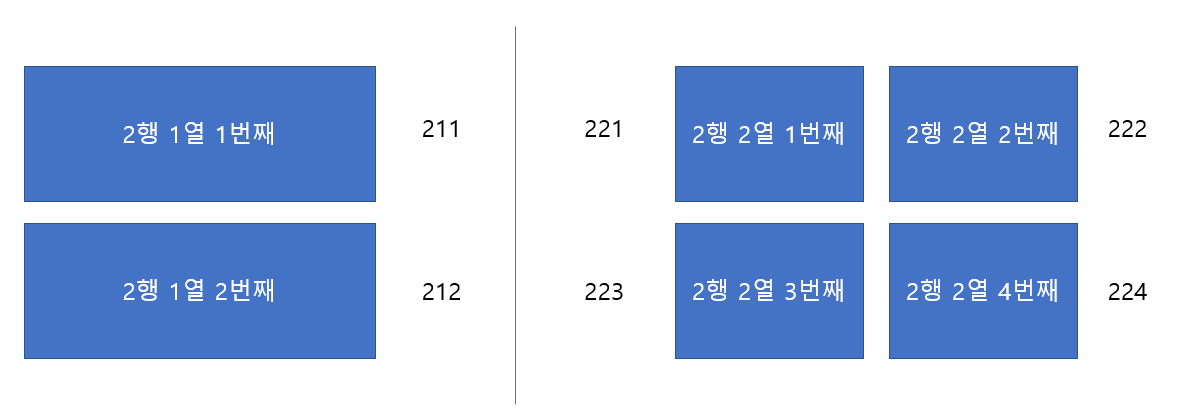

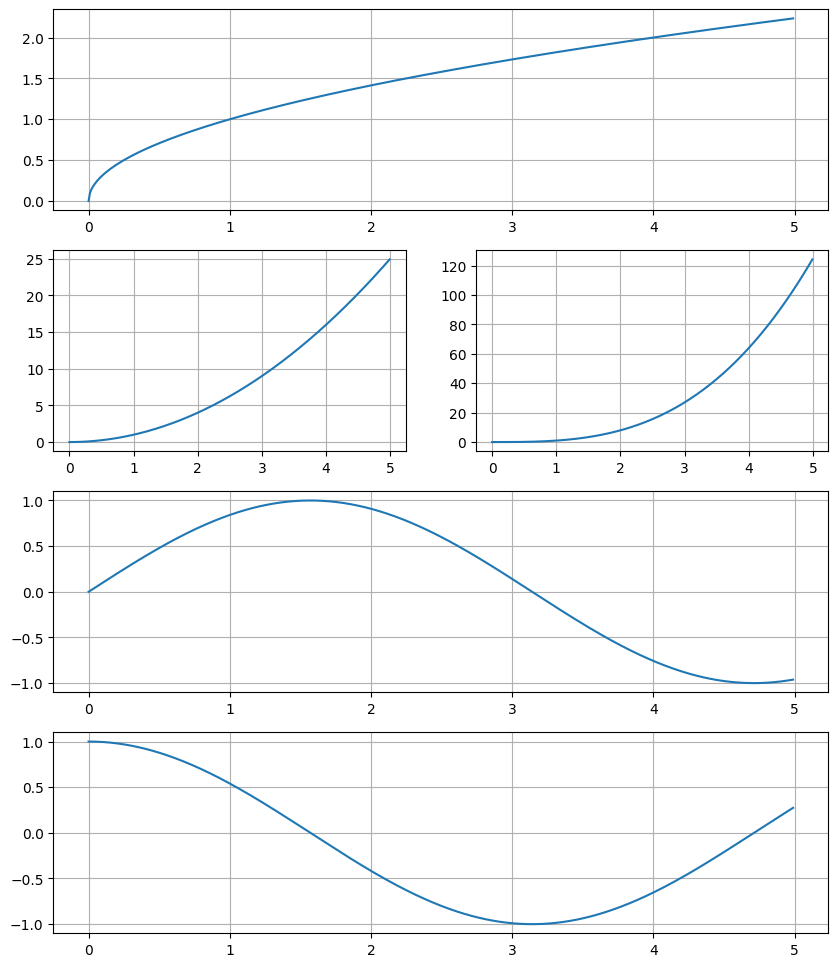

In [128]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

# 9. CCTV와 인구현황 그래프로 분석하기

#### 한글 폰트 설정

**구글 코랩, 로컬에서 Matplotlib에한글을 쓰려면 폰트가 깨진다.**

**폰트 설정은 재시작 해야한다.**

**이 코드는 제일 위에 갖다 붙일거임**

In [129]:
# 로컬에서 사용하는 폰트 설치/세팅법

# import platform

# from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

# if platform.system() == 'Darwin':
#     rc('font', family='AppleGothic')
# elif platform.system() == 'Windows':
#     path = "c:/Windows/Fonts/malgun.ttf"
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc('font', family=font_name)
# else:
#     print('Unknown system... sorry~~~~')

In [130]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [131]:
# 폰트 설정
# 꼭! 한글폰트 설정 돌리기 (런타임 모두 종료)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

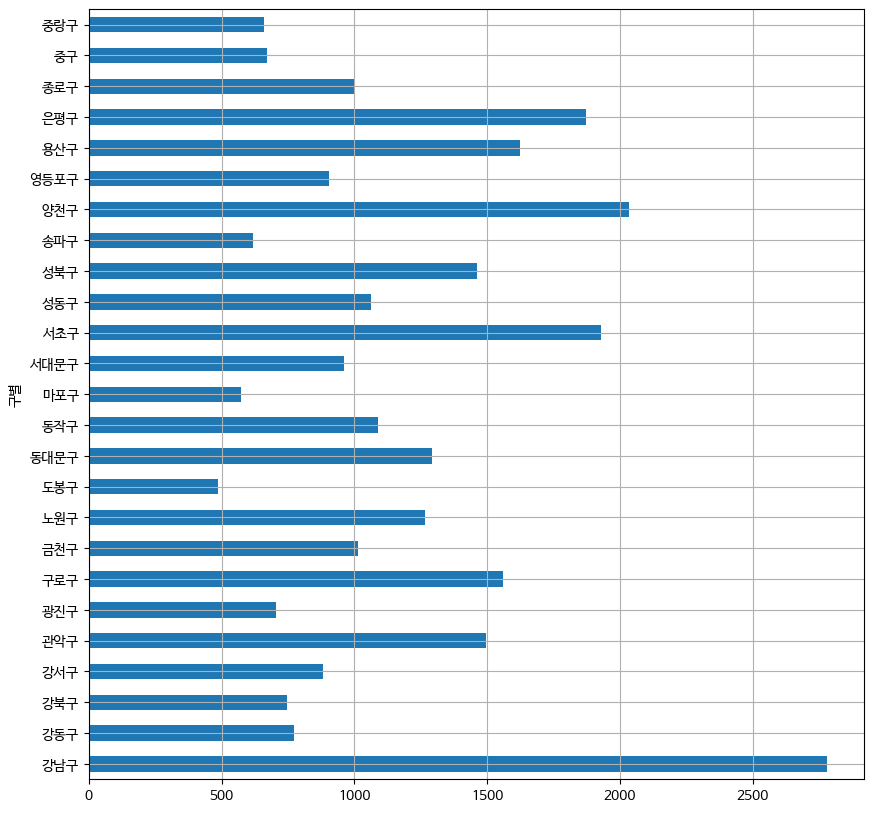

In [142]:
# 그래프를 그릴거야

# 재료 : 소계
# 종류 : barh (바 형태, horizon)
# grid 넣고
# 그림 사이즈는 10,10

plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

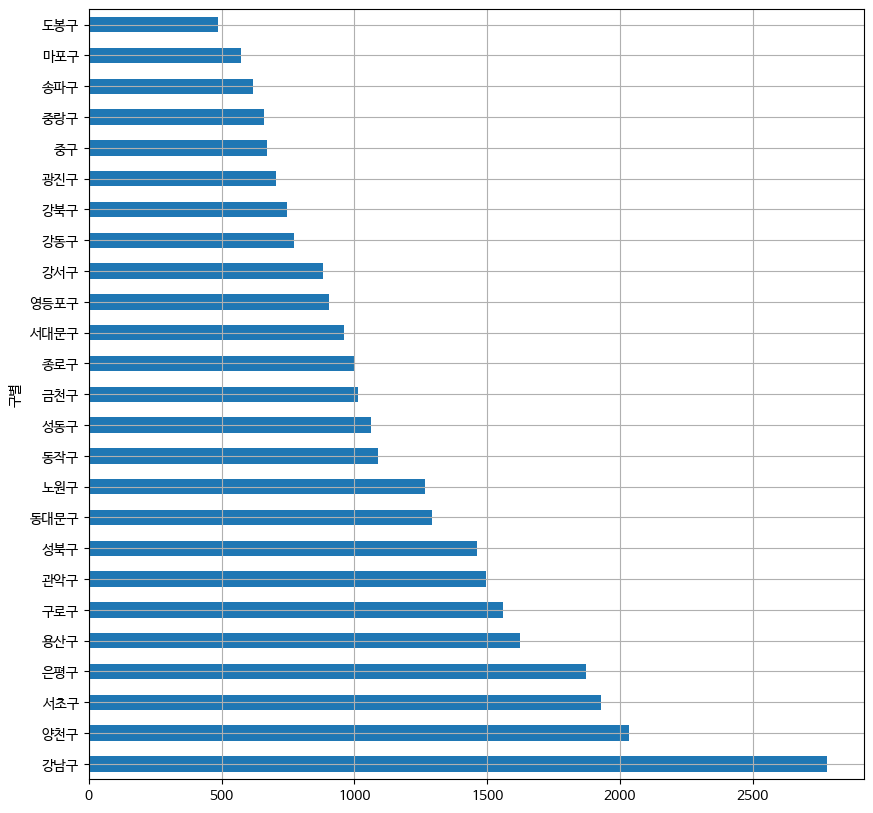

In [143]:
# 오름차순 적용

data_result['소계'].sort_values(ascending=False).plot(kind='barh',
                                     grid=True, figsize=(10,10))
plt.show()

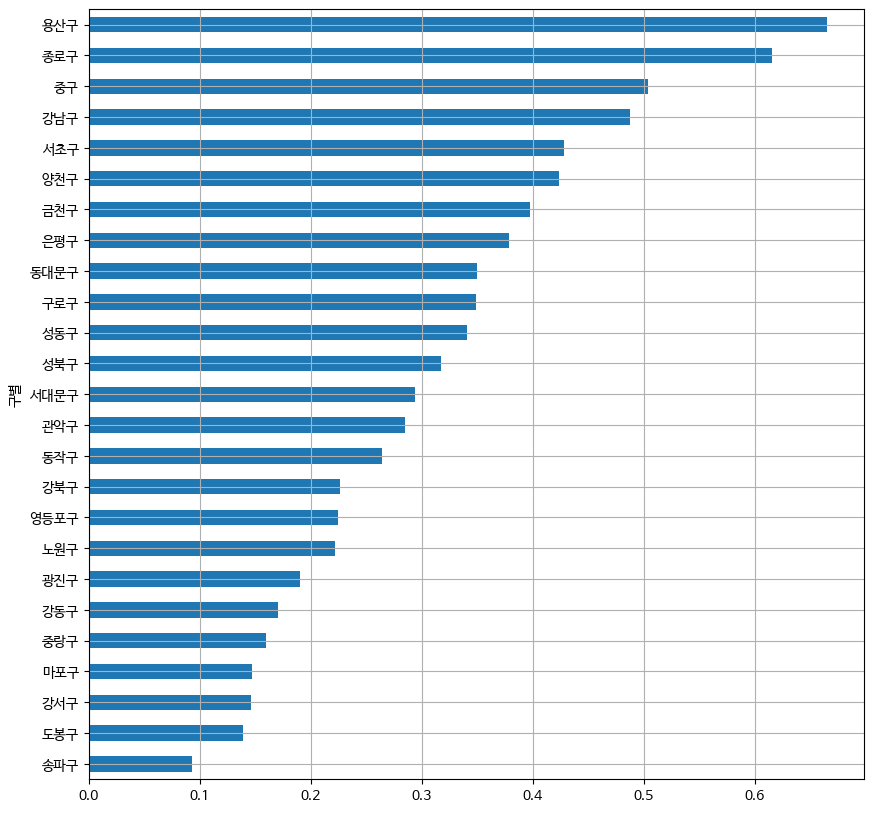

In [144]:
# 사람 1명당 CCTV 데이터가 많은 지역 순으로 그래프 생성

data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh',
                                         grid=True, figsize=(10,10))
plt.show()

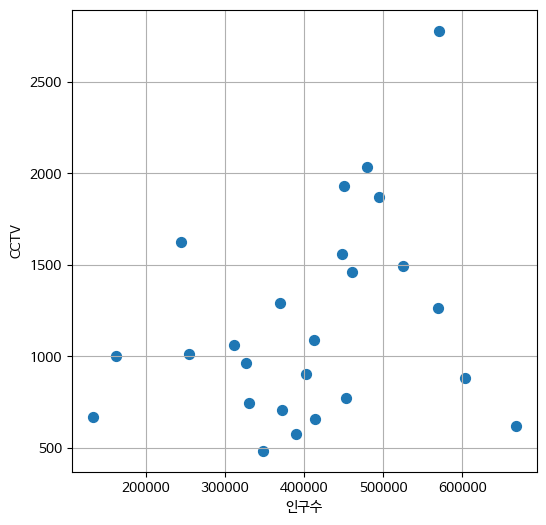

In [145]:
# 산점도
# x : 인구수    y : CCTV 수


plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [146]:
# 굳이 공부하지 않아도 괜찮음. polyfit
# 평균 구하기

fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [147]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

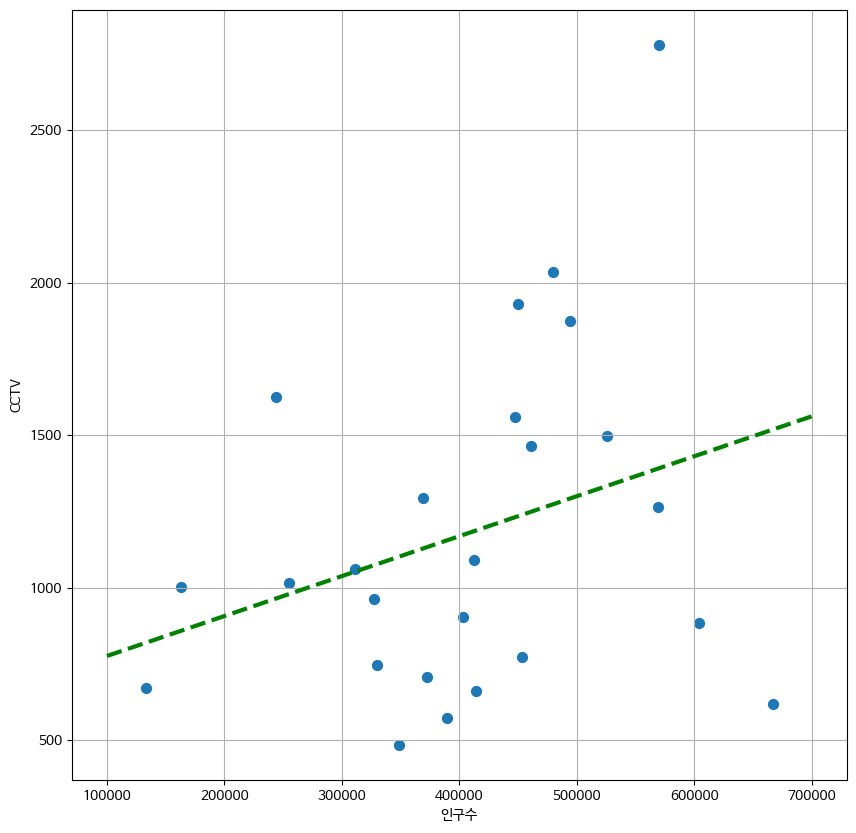

In [148]:
# 평균보다 CCTV 많은지 적은지 그래프에 표시

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 10. 조금더 설득력 있는 자료 만들기

In [139]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


<ipython-input-140-e929fbd22edf>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,


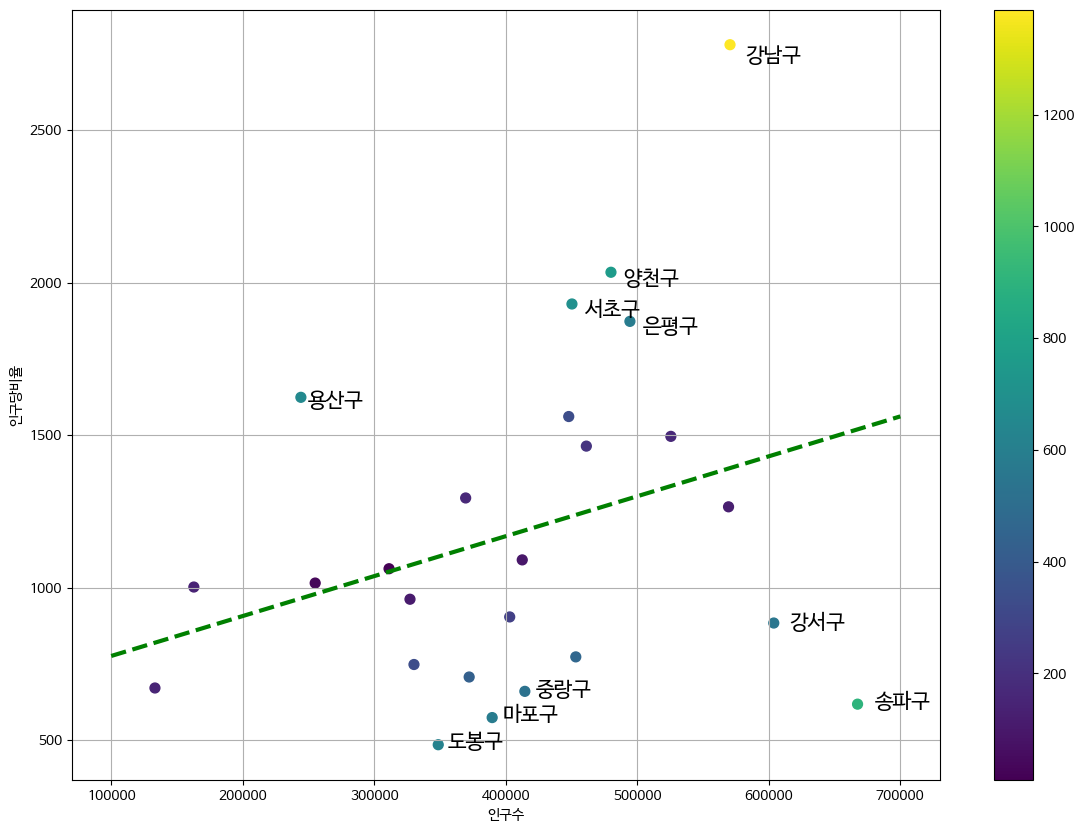

In [140]:
# 각 좌표

plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
             df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다